In [1]:
import evaluation_helper
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
import re
import plotly.express as px
import os
import pandas as pd

In [2]:
output_files = set(os.listdir("output/"))

In [3]:
results = {}
all_models = set()

mcelroy_adulthood_binary.csv
00_bag_of_words
MAE 0.09993831414064758 0.0552929085303186 0.05463071504318599
01_harmony_paraphrase-multilingual-MiniLM-L12-v2
MAE 0.3503115010083487 0.0552929085303186 0.35078287336873976


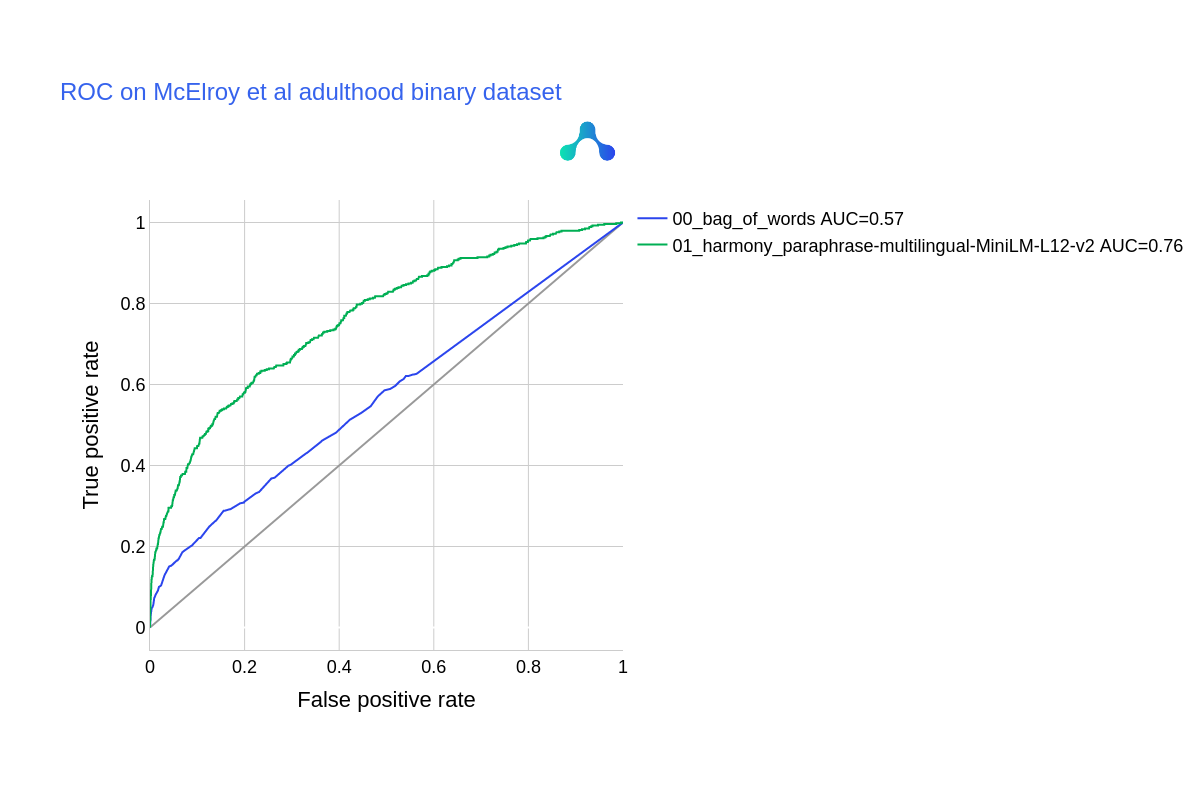

doxa_train_need_to_replace_with_test_continuous.csv
00_bag_of_words
MAE 0.24940891719992797 0.2621352615908124 0.034685888651886716
01_harmony_paraphrase-multilingual-MiniLM-L12-v2
MAE 0.23914399139641362 0.2621352615908124 0.3257685272731142
gad_7_multilingual_binary.csv
01_harmony_paraphrase-multilingual-MiniLM-L12-v2
MAE 0.40144466133787093 0.12941176470588237 0.43132661099733816
00_bag_of_words
MAE 0.13142541244080777 0.12941176470588237 0.003257865564659798


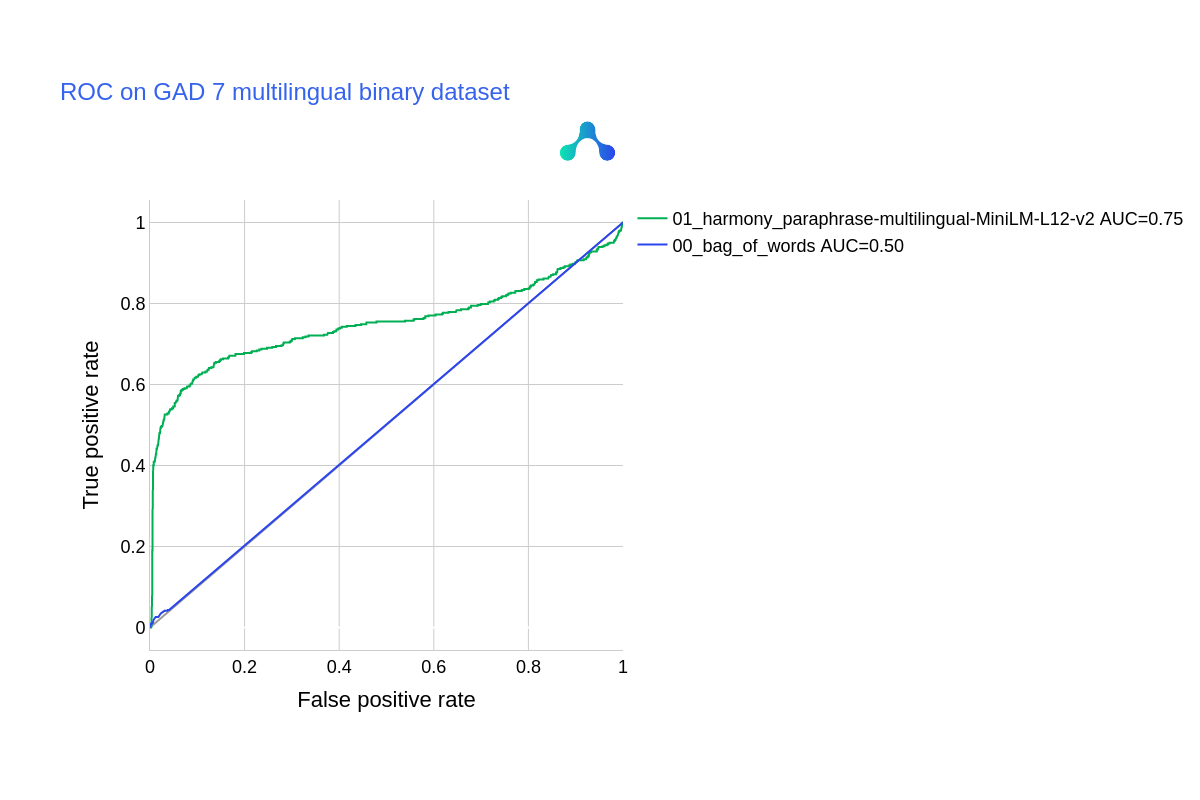

mcelroy_cosine_correlation_continuous.csv
00_bag_of_words
MAE 0.5914768003859419 0.6442449059797571 0.05276810559381516
01_harmony_paraphrase-multilingual-MiniLM-L12-v2
MAE 0.25960195575000905 0.6442449059797571 0.38740305358290283
mcelroy_childhood_binary.csv
00_bag_of_words
MAE 0.0536192913459767 0.0396987896987897 0.018912418535028397
01_harmony_paraphrase-multilingual-MiniLM-L12-v2
MAE 0.24223941588501496 0.0396987896987897 0.23710557693015982


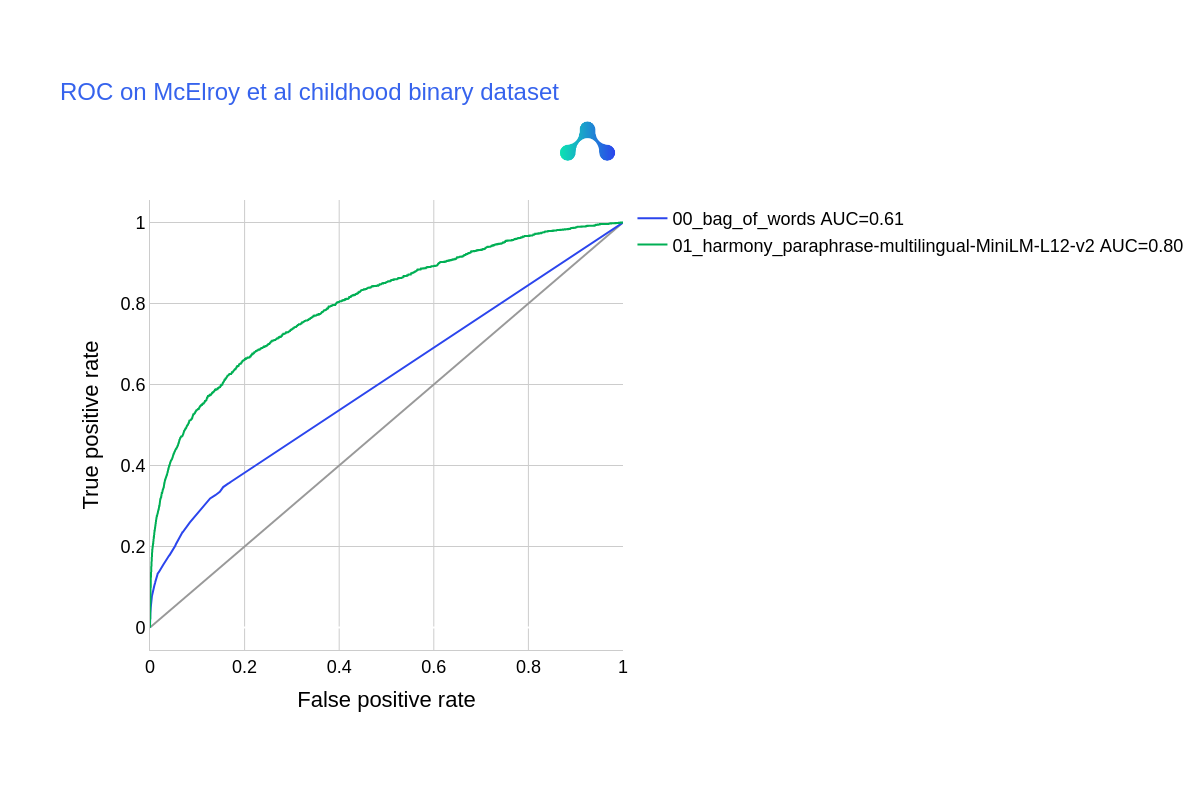

mcelroy_adulthood_binary.csv
11_all-mpnet-base-v2
MAE 0.30030571286972874 0.0552929085303186 0.2941883278411384


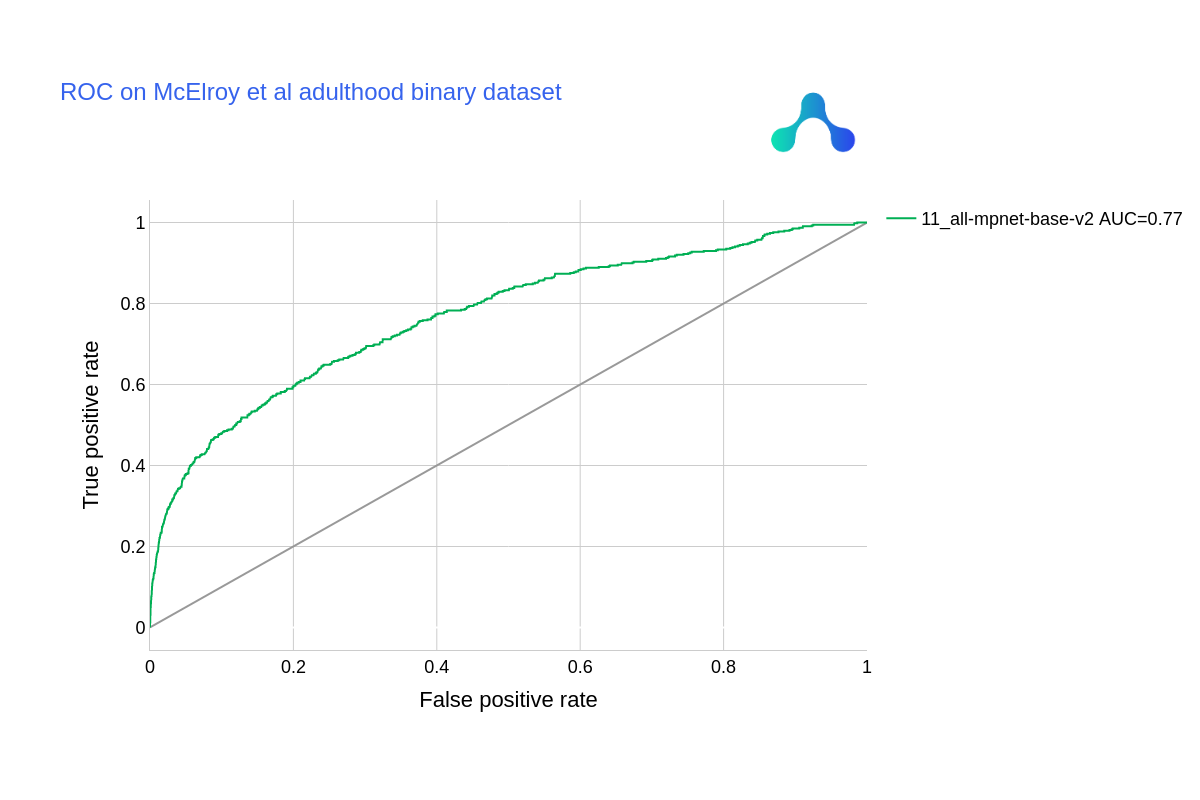

doxa_train_need_to_replace_with_test_continuous.csv
11_all-mpnet-base-v2
MAE 0.2201318968370503 0.2621352615908124 0.26366032883064594
gad_7_multilingual_binary.csv
11_all-mpnet-base-v2
MAE 0.30588731221691035 0.12941176470588237 0.23784774119875762


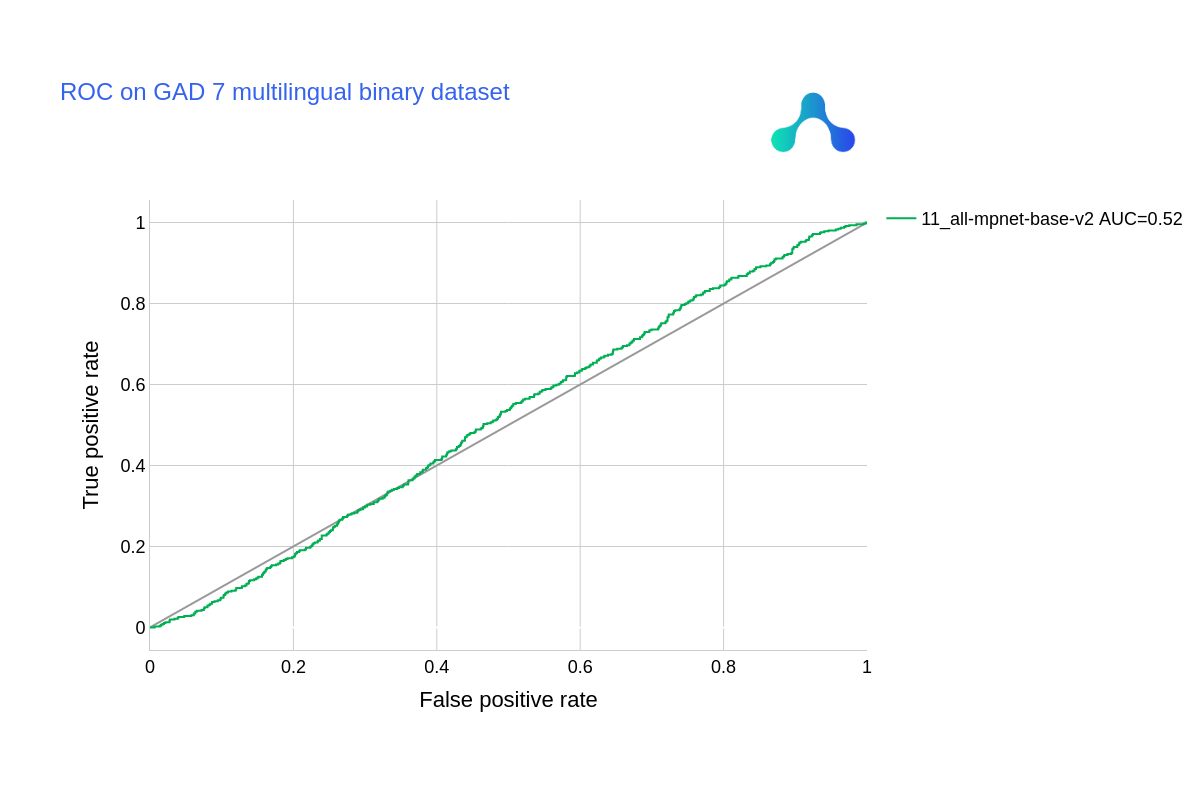

mcelroy_cosine_correlation_continuous.csv
11_all-mpnet-base-v2
MAE 0.3166468185642072 0.6442449059797571 0.32820588235280623
mcelroy_childhood_binary.csv
11_all-mpnet-base-v2
MAE 0.22890228624122858 0.0396987896987897 0.22266964882875906


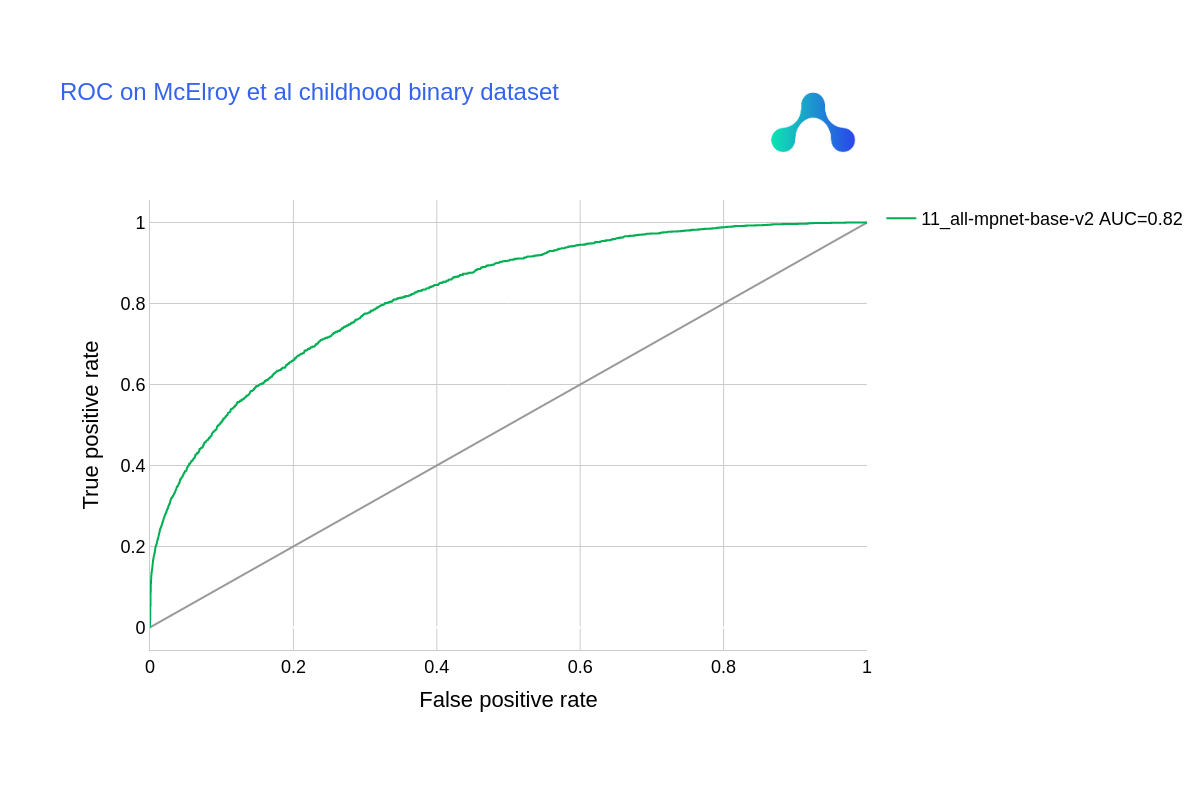

mcelroy_adulthood_binary.csv
21_openai_text-embedding-ada-002
MAE 0.7634562541745851 0.0552929085303186 0.8010542238173995


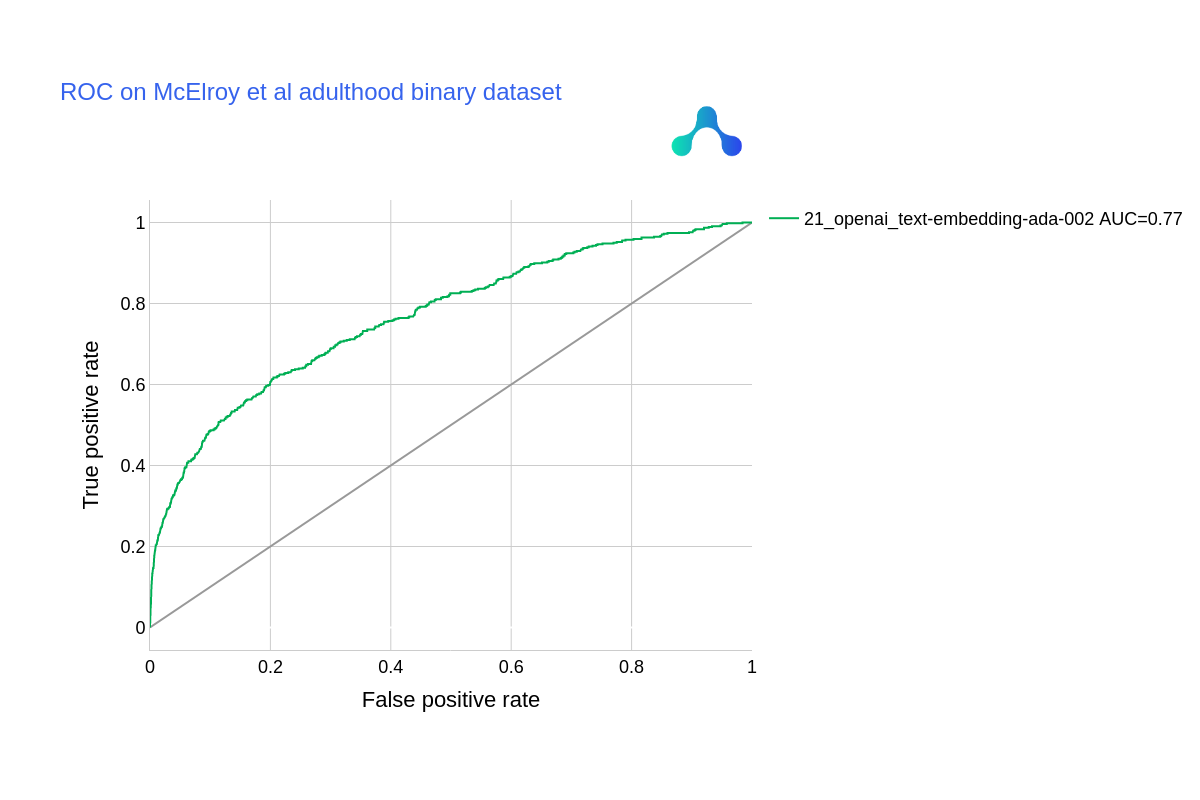

doxa_train_need_to_replace_with_test_continuous.csv
21_openai_text-embedding-ada-002
MAE 0.5346252569048777 0.2621352615908124 0.7898566672360939
gad_7_multilingual_binary.csv
21_openai_text-embedding-ada-002
MAE 0.6891760717813699 0.12941176470588237 0.7661580520796957


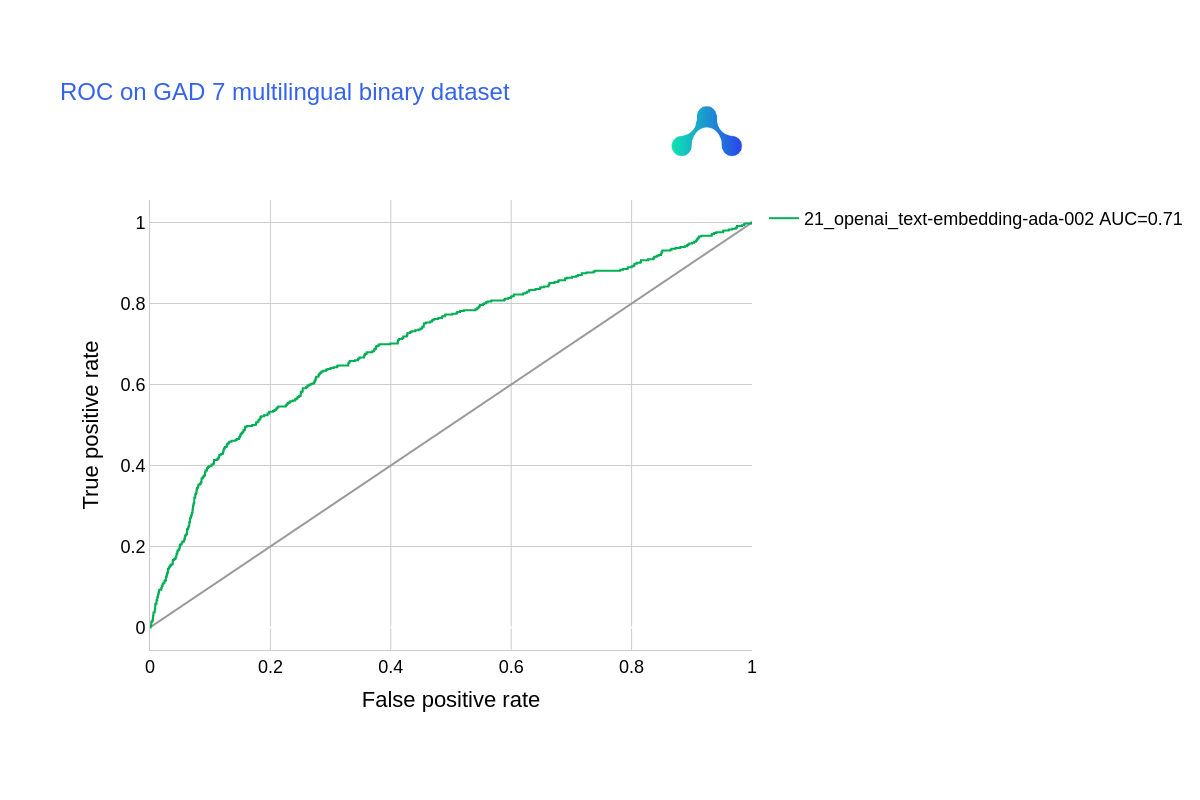

mcelroy_cosine_correlation_continuous.csv
21_openai_text-embedding-ada-002
MAE 0.18663062997440785 0.6442449059797571 0.830875535954165
mcelroy_childhood_binary.csv
21_openai_text-embedding-ada-002
MAE 0.7576341088010644 0.0396987896987897 0.7843092637270577


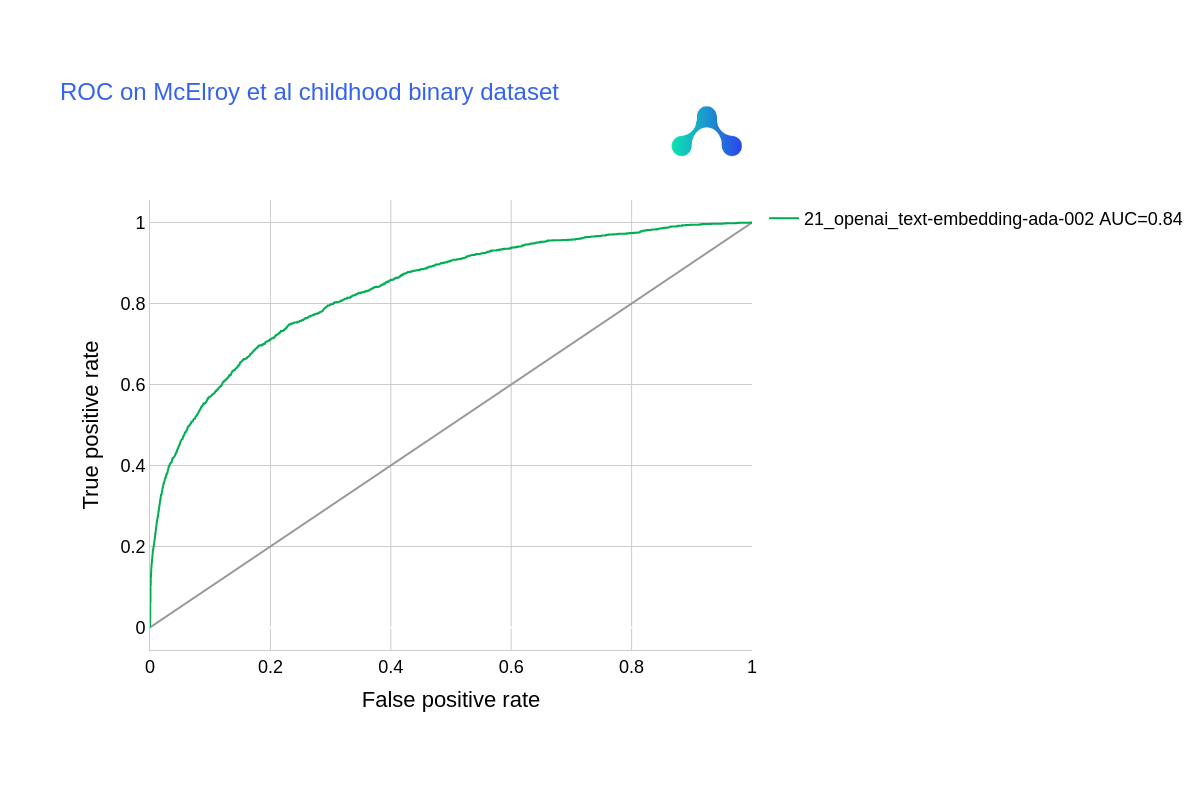

mcelroy_adulthood_binary.csv


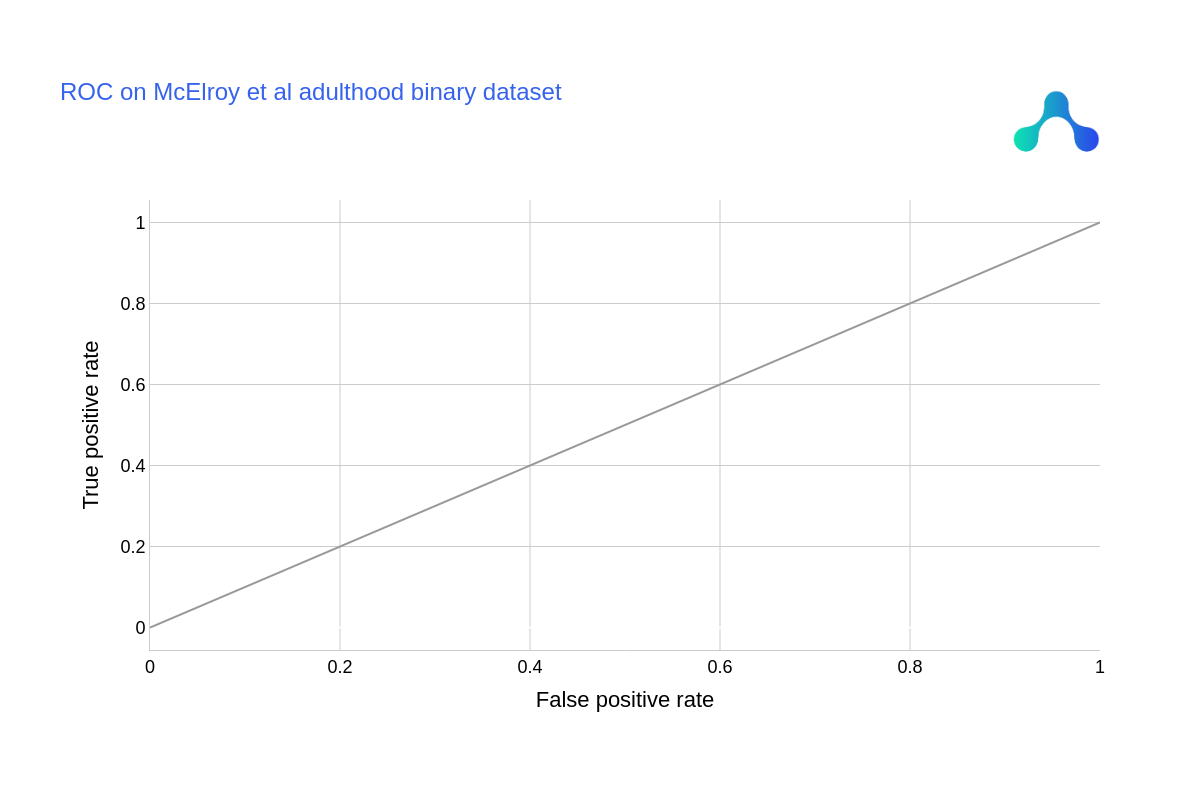

doxa_train_need_to_replace_with_test_continuous.csv
gad_7_multilingual_binary.csv


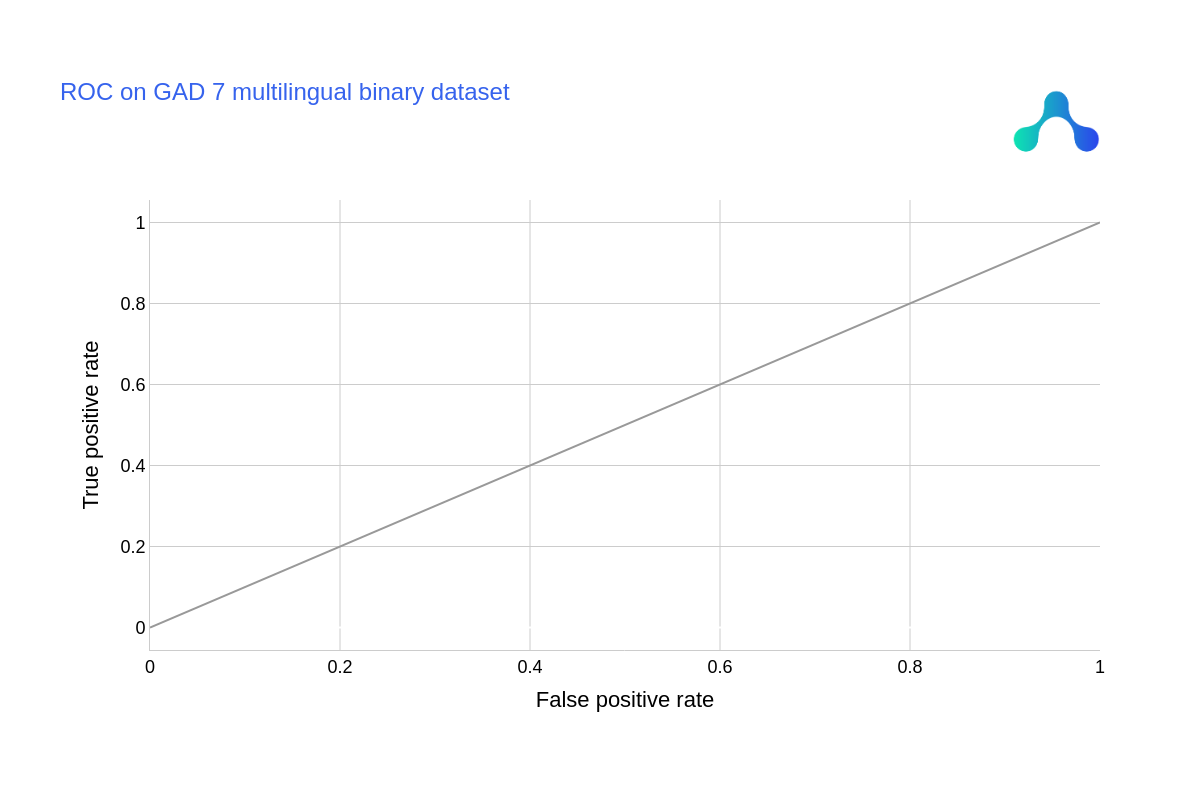

mcelroy_cosine_correlation_continuous.csv
mcelroy_childhood_binary.csv


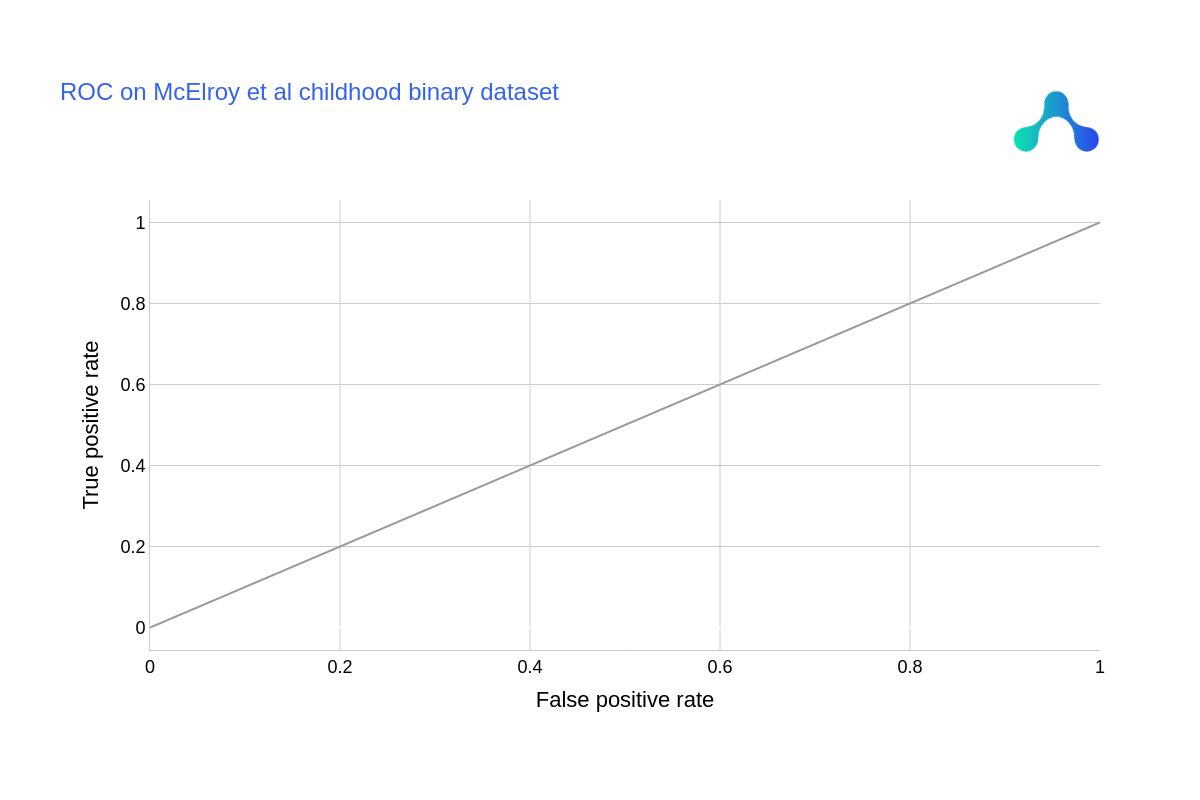

mcelroy_adulthood_binary.csv
42_raafi
MAE 0.30729333849021523 0.0552929085303186 0.30291892217652383
41_jose
MAE 0.2857888321725866 0.0552929085303186 0.28067819676704525


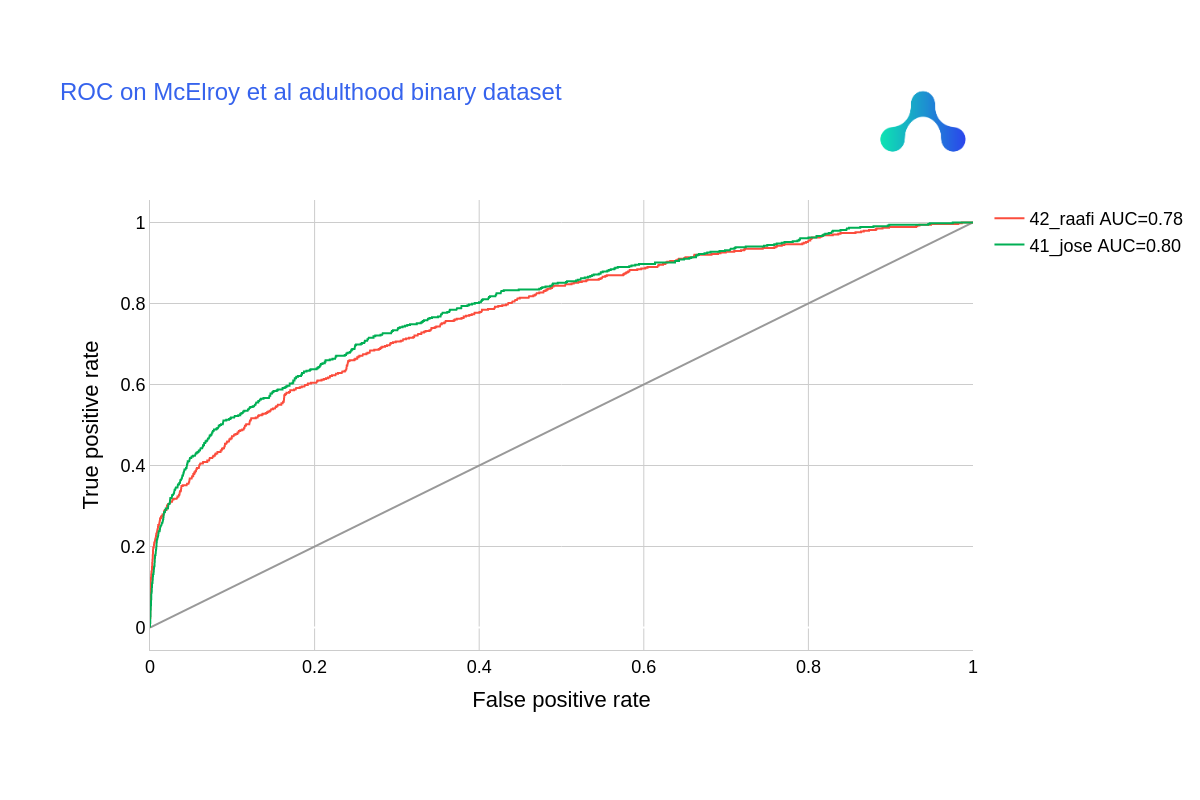

doxa_train_need_to_replace_with_test_continuous.csv
41_jose
MAE 0.17582964825775427 0.2621352615908124 0.21769149355791934
42_raafi
MAE 0.15352657102272868 0.2621352615908124 0.20833939515038397
gad_7_multilingual_binary.csv
41_jose
MAE 0.32192367812287753 0.12941176470588237 0.2601870234069552
42_raafi
MAE 0.46297784642164425 0.12941176470588237 0.4516793950173599


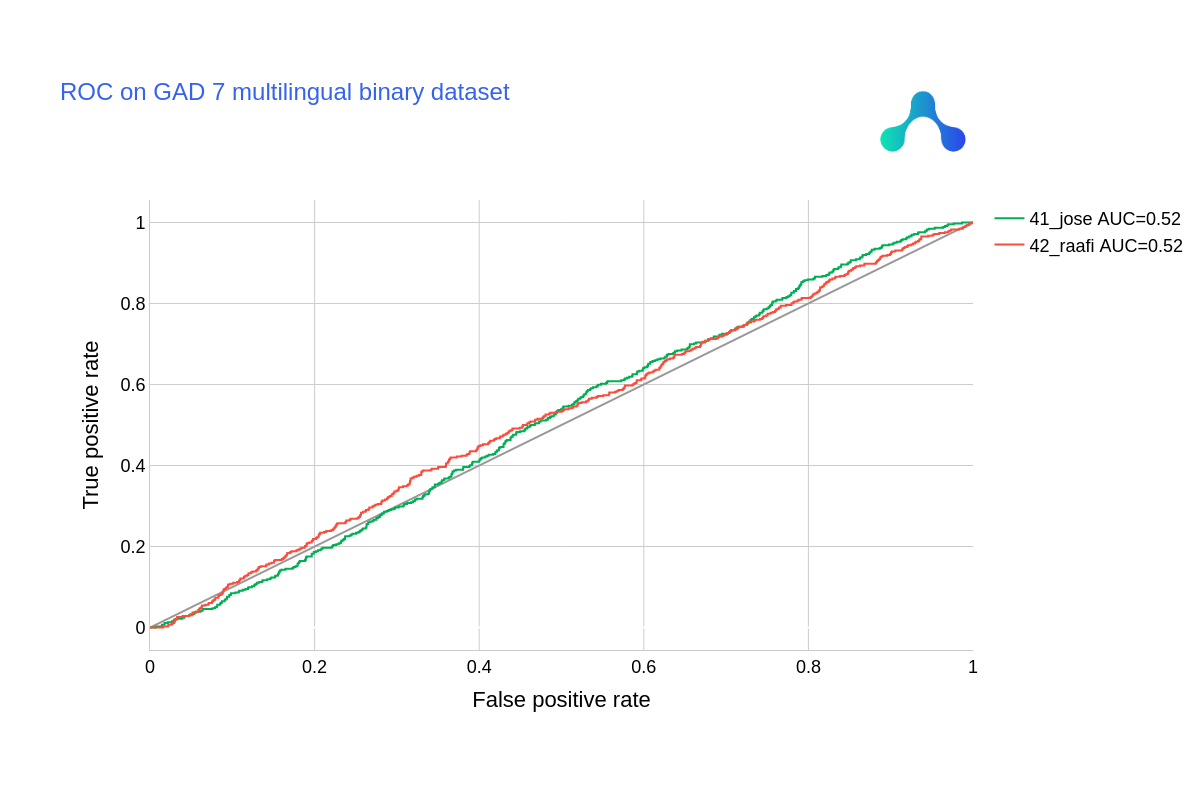

mcelroy_cosine_correlation_continuous.csv
41_jose
MAE 0.31697954460005046 0.6442449059797571 0.32887038083443837
42_raafi
MAE 0.33471837290264017 0.6442449059797571 0.3118656096656062
mcelroy_childhood_binary.csv
42_raafi
MAE 0.2712190994999108 0.0396987896987897 0.26756524652744107
41_jose
MAE 0.20022153333606404 0.0396987896987897 0.1932100444385379


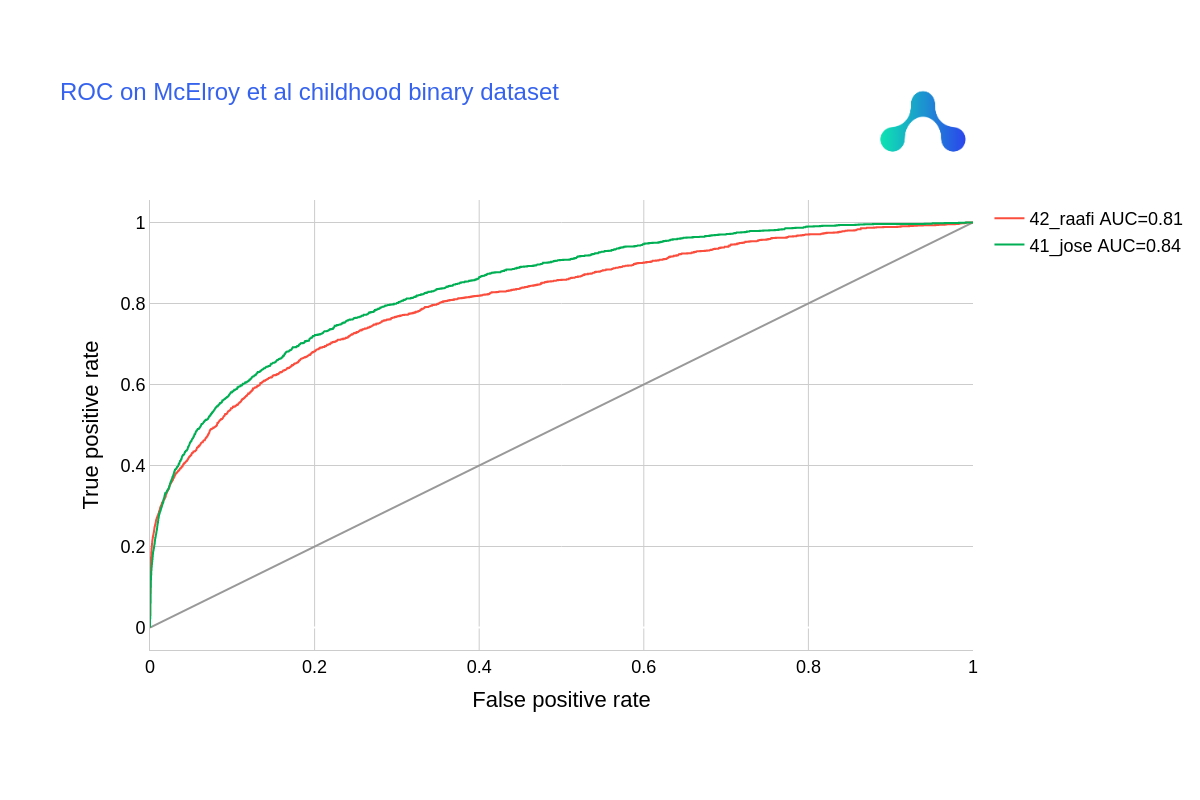

In [4]:
for model_first_digit in ["0", "1", "2", "3", "4"]:

    for input_file, data in evaluation_helper.get_datasets():
        print(input_file)
        
        
        
        input_file_pretty = re.sub(r'.csv', '', re.sub(r'_', ' ', input_file))
        input_file_pretty = re.sub(r'gad', 'GAD', input_file_pretty)
        input_file_pretty = re.sub(r'mcelroy', 'McElroy et al', input_file_pretty)
        # input_file_pretty = re.sub(r' binary', '', input_file_pretty)

        if input_file_pretty in results:
            results_this_file = results[input_file_pretty]
        else:
            results_this_file = {}
            results[input_file_pretty] = results_this_file    
        
        
        diagonal_range = np.arange(0,1.01,0.1)
    
        if "continuous" not in input_file:
            # Make a ROC curve
            fig = px.line(x=diagonal_range, y=diagonal_range,
                            title=f"ROC on {input_file_pretty} dataset")
            fig.update_traces(line_color="#999999")
        
        
        for output_file in output_files:
            if not output_file.startswith(model_first_digit):
                continue
       
            if input_file in output_file:
                model_name = re.sub(r'_model_on.+', '', output_file)
                print (model_name)
                all_models.add(model_name)
                model_number = int(model_name[:2]) % 10
                
                
                
                output_data = pd.read_csv(f"output/{output_file}", sep="\t")
                data["y_pred"] = output_data["y_pred"]
                
                
                corr_matrix = np.corrcoef(data.y, data.y_pred)
                corr = corr_matrix[0,1]
                R_sq = corr**2
                
                roc_auc = 0

                this_mae = mean_absolute_error(data["y"], data["y_pred"])
                print ("MAE", this_mae, data.y.mean(), data.y_pred.mean())
    
                if "continuous" not in input_file:
                    fpr, tpr, threshold = metrics.roc_curve(data.y, data.y_pred)
                    roc_auc = metrics.auc(fpr, tpr)
                    
                    colours = {0:"#2b45ed",
                           1:"#00af54",
                              2:"#fb4d3d",
                              3:"#aeb8fe",
                               4:"#0de5b2",
                              
                              5:"#0f1854",
                               6:"#000000",
                               7:"#888888",
                                8:"#ff0000",
                               9:"#aaaa00",
                               10:"#00ffff",
                              }
                    
                    fig.add_scatter(x=fpr, y=tpr, mode="lines", name=f"{model_name} AUC={roc_auc:.2f}", line=dict(color=colours[model_number])) 
                    
                results_this_file[model_name] = {"correlation": corr, "R²": R_sq, "AUC": roc_auc, "MAE": this_mae}
    
        if "continuous" not in input_file:
            fig.update_xaxes(showline=True, linewidth=1, linecolor='#cccccc', gridcolor='#cccccc')
            fig.update_yaxes(showline=True, linewidth=1, linecolor='#cccccc', gridcolor='#cccccc')
            
            fig.add_layout_image(
                            dict(
                                source="https://raw.githubusercontent.com/harmonydata/brand/main/logomark/PNG/Logomark-04.png",
                                xref="paper", yref="paper",
                                x=1.05, y=1.05,
                                sizex=0.25, sizey=0.25,
                                xanchor="right", yanchor="bottom"
                            )
                        )
    
            fig.update_layout(
                title_font_family="Helvetica",
                xaxis_title="False positive rate",
                yaxis_title="True positive rate",
                font=dict(
                    family="Helvetica",
                    size=18,
                    color="rgb(0,0,0)"
                ),
                title_font=dict(
                    family="Helvetica",
                    size=24,
                    color="rgb(54,99,237)"
                ),
                paper_bgcolor='rgb(255,255,255)',
                plot_bgcolor='rgb(255,255,255)',
                width=1200,
                height=800,
                margin=dict(l=150, r=100, t=200, b=150),
            )
    
            fig.show(renderer="png")

In [5]:
import json
print (json.dumps(results, indent=4, ensure_ascii=False))

{
    "McElroy et al adulthood binary": {
        "00_bag_of_words": {
            "correlation": 0.12510686454417846,
            "R²": 0.01565172755607542,
            "AUC": 0.5696707537829889,
            "MAE": 0.09993831414064758
        },
        "01_harmony_paraphrase-multilingual-MiniLM-L12-v2": {
            "correlation": 0.2523281161488971,
            "R²": 0.06366947819925131,
            "AUC": 0.7624419246087596,
            "MAE": 0.3503115010083487
        },
        "11_all-mpnet-base-v2": {
            "correlation": 0.27851773034711746,
            "R²": 0.07757212611770964,
            "AUC": 0.7691889423807999,
            "MAE": 0.30030571286972874
        },
        "21_openai_text-embedding-ada-002": {
            "correlation": 0.2755408608733218,
            "R²": 0.07592276601081129,
            "AUC": 0.768826577822642,
            "MAE": 0.7634562541745851
        },
        "42_raafi": {
            "correlation": 0.30677388673775485,
            "R²": 

In [6]:
def get_metric(dataset_name):
                if dataset_name in results:
                    dataset_results = results[dataset_name]
                    if model_name in dataset_results:
                        return dataset_results[model_name][metric]
                return "N/A"
    
    
with pd.ExcelWriter('output.xlsx') as writer:  
    for metric in ["correlation", "R²", "AUC", "MAE"]:
        df_results = pd.DataFrame()
        df_results["dataset"] = sorted(results)
        for model_name in sorted(all_models):
            
            df_results[model_name] = df_results["dataset"].apply(get_metric)
        df_results.to_excel(writer, sheet_name=metric, index=False)

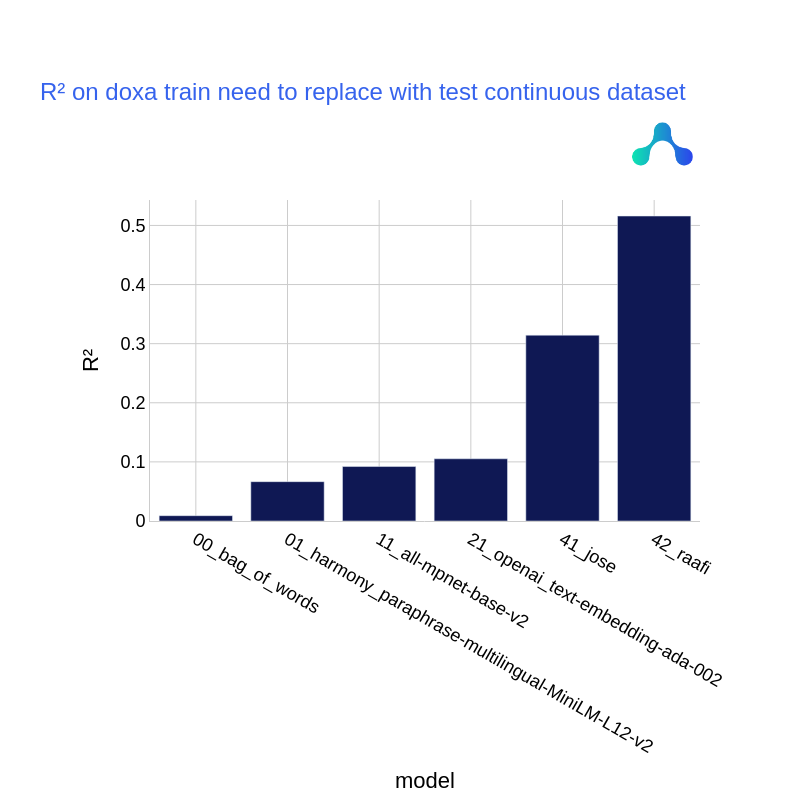

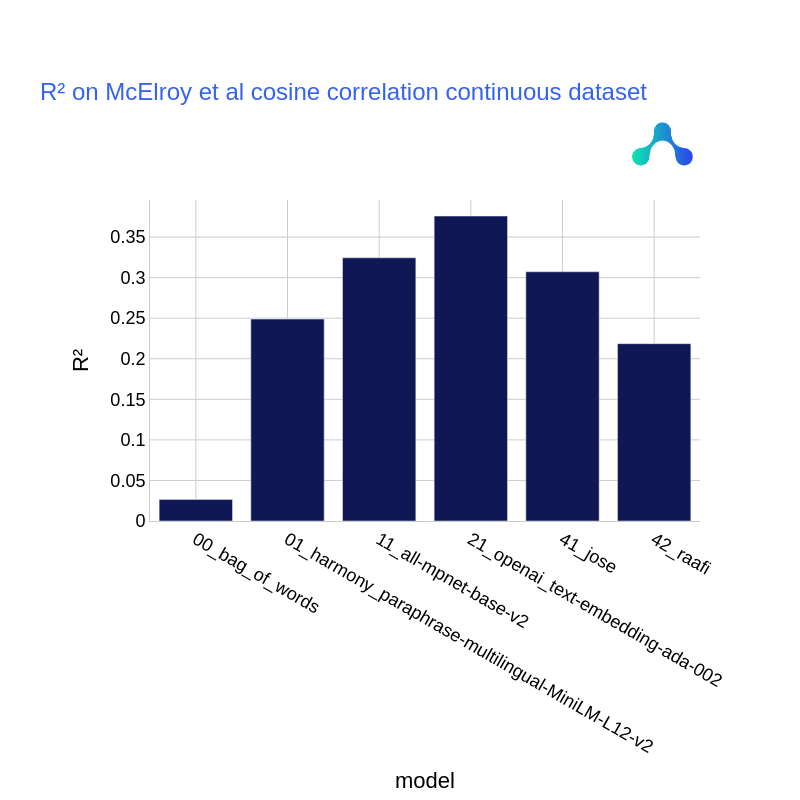

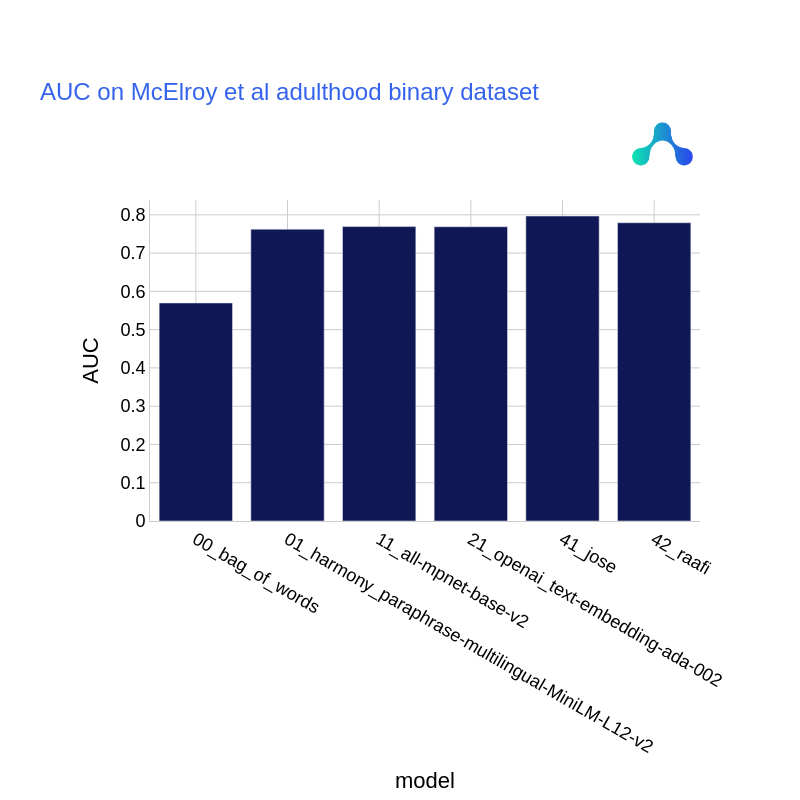

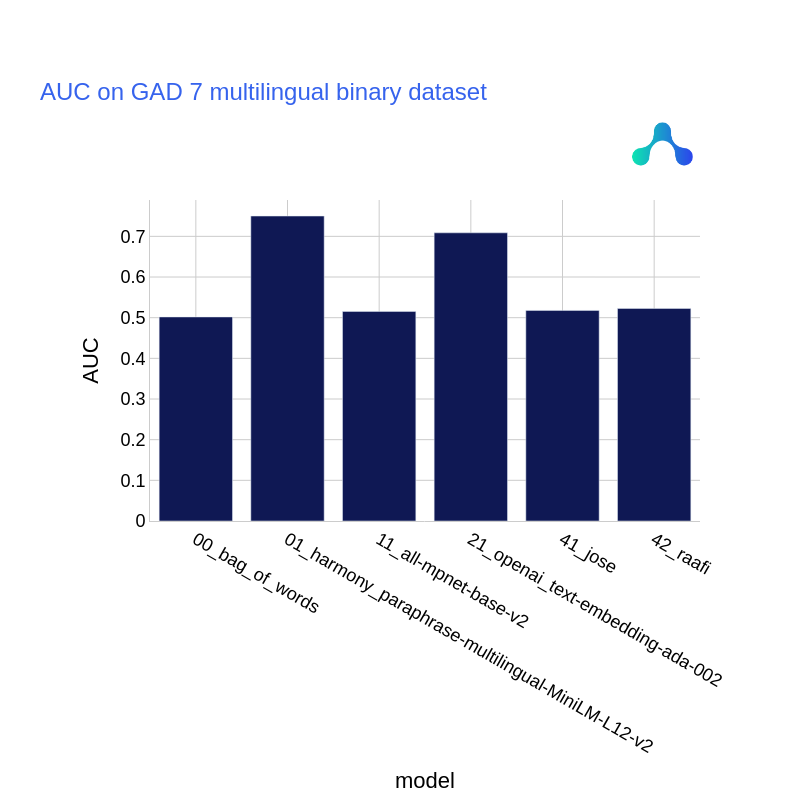

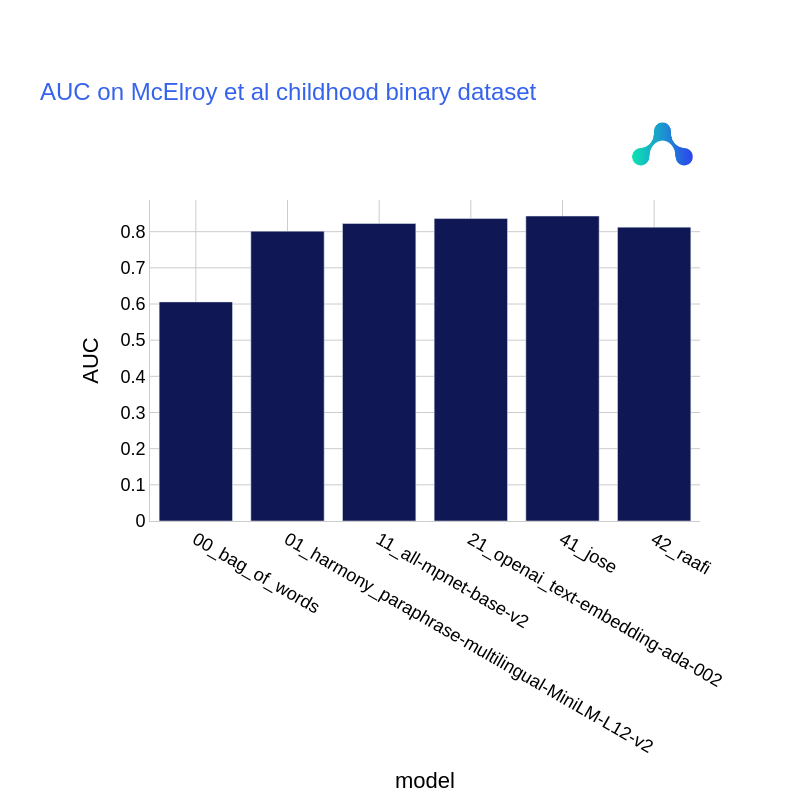

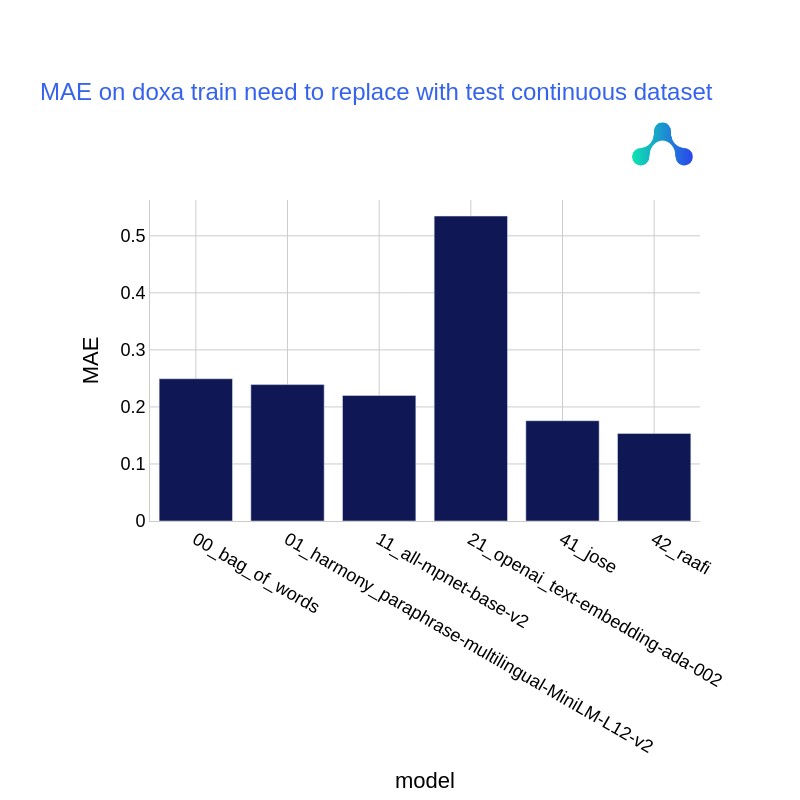

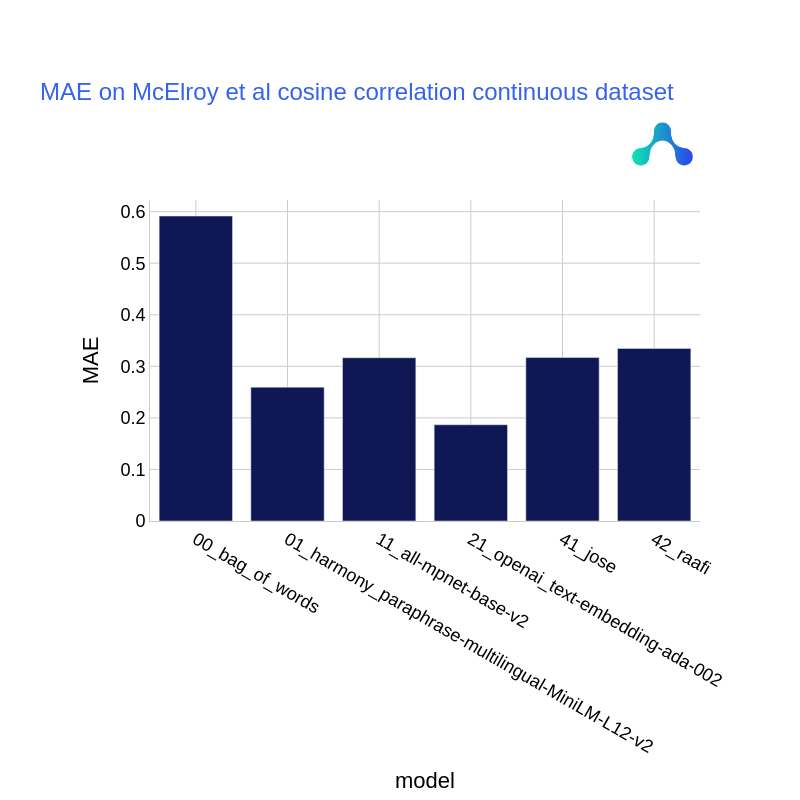

In [7]:
for metric in ["R²", "AUC", "MAE"]:
    for dataset, results_per_model in results.items():

        if metric == "R²" or metric == "MAE":
            if "continuous" not in dataset:
                continue
        if metric == "AUC":
            if "binary" not in dataset:
                continue
                
        df = pd.DataFrame()
        df['model'] = sorted(results_per_model)
        df[metric] = df['model'].apply(lambda model_name : results_per_model[model_name][metric])
        
        fig = px.bar(data_frame=df, x="model", y=metric, title=f"{metric} on {dataset} dataset",
                   color_discrete_sequence=['#0f1854']
                  )
        
        fig.update_xaxes(showline=True, linewidth=1, linecolor='#cccccc', gridcolor='#cccccc')
        fig.update_yaxes(showline=True, linewidth=1, linecolor='#cccccc', gridcolor='#cccccc')
        
        fig.add_layout_image(
                        dict(
                            source="https://raw.githubusercontent.com/harmonydata/brand/main/logomark/PNG/Logomark-04.png",
                            xref="paper", yref="paper",
                            x=1.05, y=1.05,
                            sizex=0.25, sizey=0.25,
                            xanchor="right", yanchor="bottom"
                        )
                    )

        fig.update_layout(
            title_font_family="Helvetica",
            font=dict(
                family="Helvetica",
                size=18,
                color="rgb(0,0,0)"
            ),
            title_font=dict(
                family="Helvetica",
                size=24,
                color="rgb(54,99,237)"
            ),
            paper_bgcolor='rgb(255,255,255)',
            plot_bgcolor='rgb(255,255,255)',
            width=800,
            height=800,
            margin=dict(l=150, r=100, t=200, b=150),
        )

        fig.show(renderer="png")